# Part A - Importing and Understanding Data

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Import the data
df = pd.read_csv('C:/Users/lixu/Desktop/u3251456_CHEN_assignment1/zomato_df_final_data.csv')
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [4]:
# Summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [5]:
# Check the column name and data type of each
print('\nColumn names:')
print(df.columns)
print('\nColumn data types:')
print(df.dtypes)


Column names:
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')

Column data types:
address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


## Question 1 Provide plots/graphs

### Question 1.1 How many unique cuisines are served by Sydney restaurants?

Explanation: Based on observations, I found that some restaurants offer more than one cuisine type. Therefore, I will use two approaches to answer this question.

Answer 1：Directly count based on the contents inside the brackets, treating the entire content within the brackets as one cuisine, regardless of how many cuisines are listed.

In [9]:
# Count unique cuisines
unique_cuisines = df['cuisine'].explode().nunique()

# Print the number of unique cuisines
print(f'The number of unique cuisines served by Sydney restaurants is {unique_cuisines}')

# Count the number of unique cuisines
df['cuisine'].value_counts()

The number of unique cuisines served by Sydney restaurants is 1759


cuisine
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']                1
['Pub Food', 'Burger', 'Pizza']               1
['Cambodian', 'Vietnamese']                   1
['Kebab', 'Burger', 'Fish and Chips']         1
Name: count, Length: 1759, dtype: int64

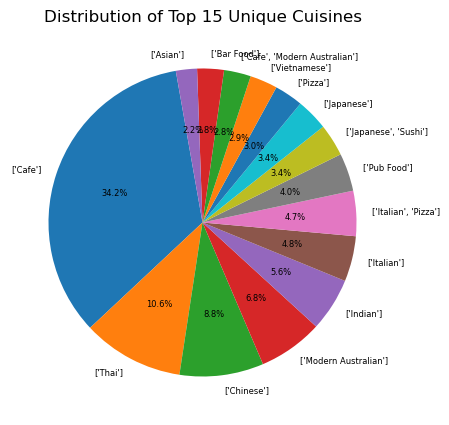

In [10]:
# Select the top 15 cuisines
cuisine_counts = df['cuisine'].value_counts()
top_cuisines = cuisine_counts.head(15)

# Present with a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=100, textprops={'fontsize': 6})
plt.title('Distribution of Top 15 Unique Cuisines')

# Display the pie chart
plt.show()

Answer 2: Split the contents inside the brackets and separately calculate the different types and their quantities.

In [12]:
# Check the data type of the column 'cuisine'
print(df['cuisine'].dtype) 

# Check the data type of each cell
print(df['cuisine'].apply(type).value_counts()) 

# Check if there are missing values
print(df['cuisine'].isnull().sum()) 

# Convert the string to the actual list
df['unique_cuisine_list'] = df['cuisine'].apply(eval) 

object
cuisine
<class 'str'>    10500
Name: count, dtype: int64
0


In [13]:
# Count unique cuisines
unique_cuisines = df['unique_cuisine_list'].explode().nunique()

# Print the number of unique cuisines
print(f'The number of unique cuisines served by Sydney restaurants is {unique_cuisines}')

The number of unique cuisines served by Sydney restaurants is 134


unique_cuisine_list
Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Name: count, Length: 134, dtype: int64


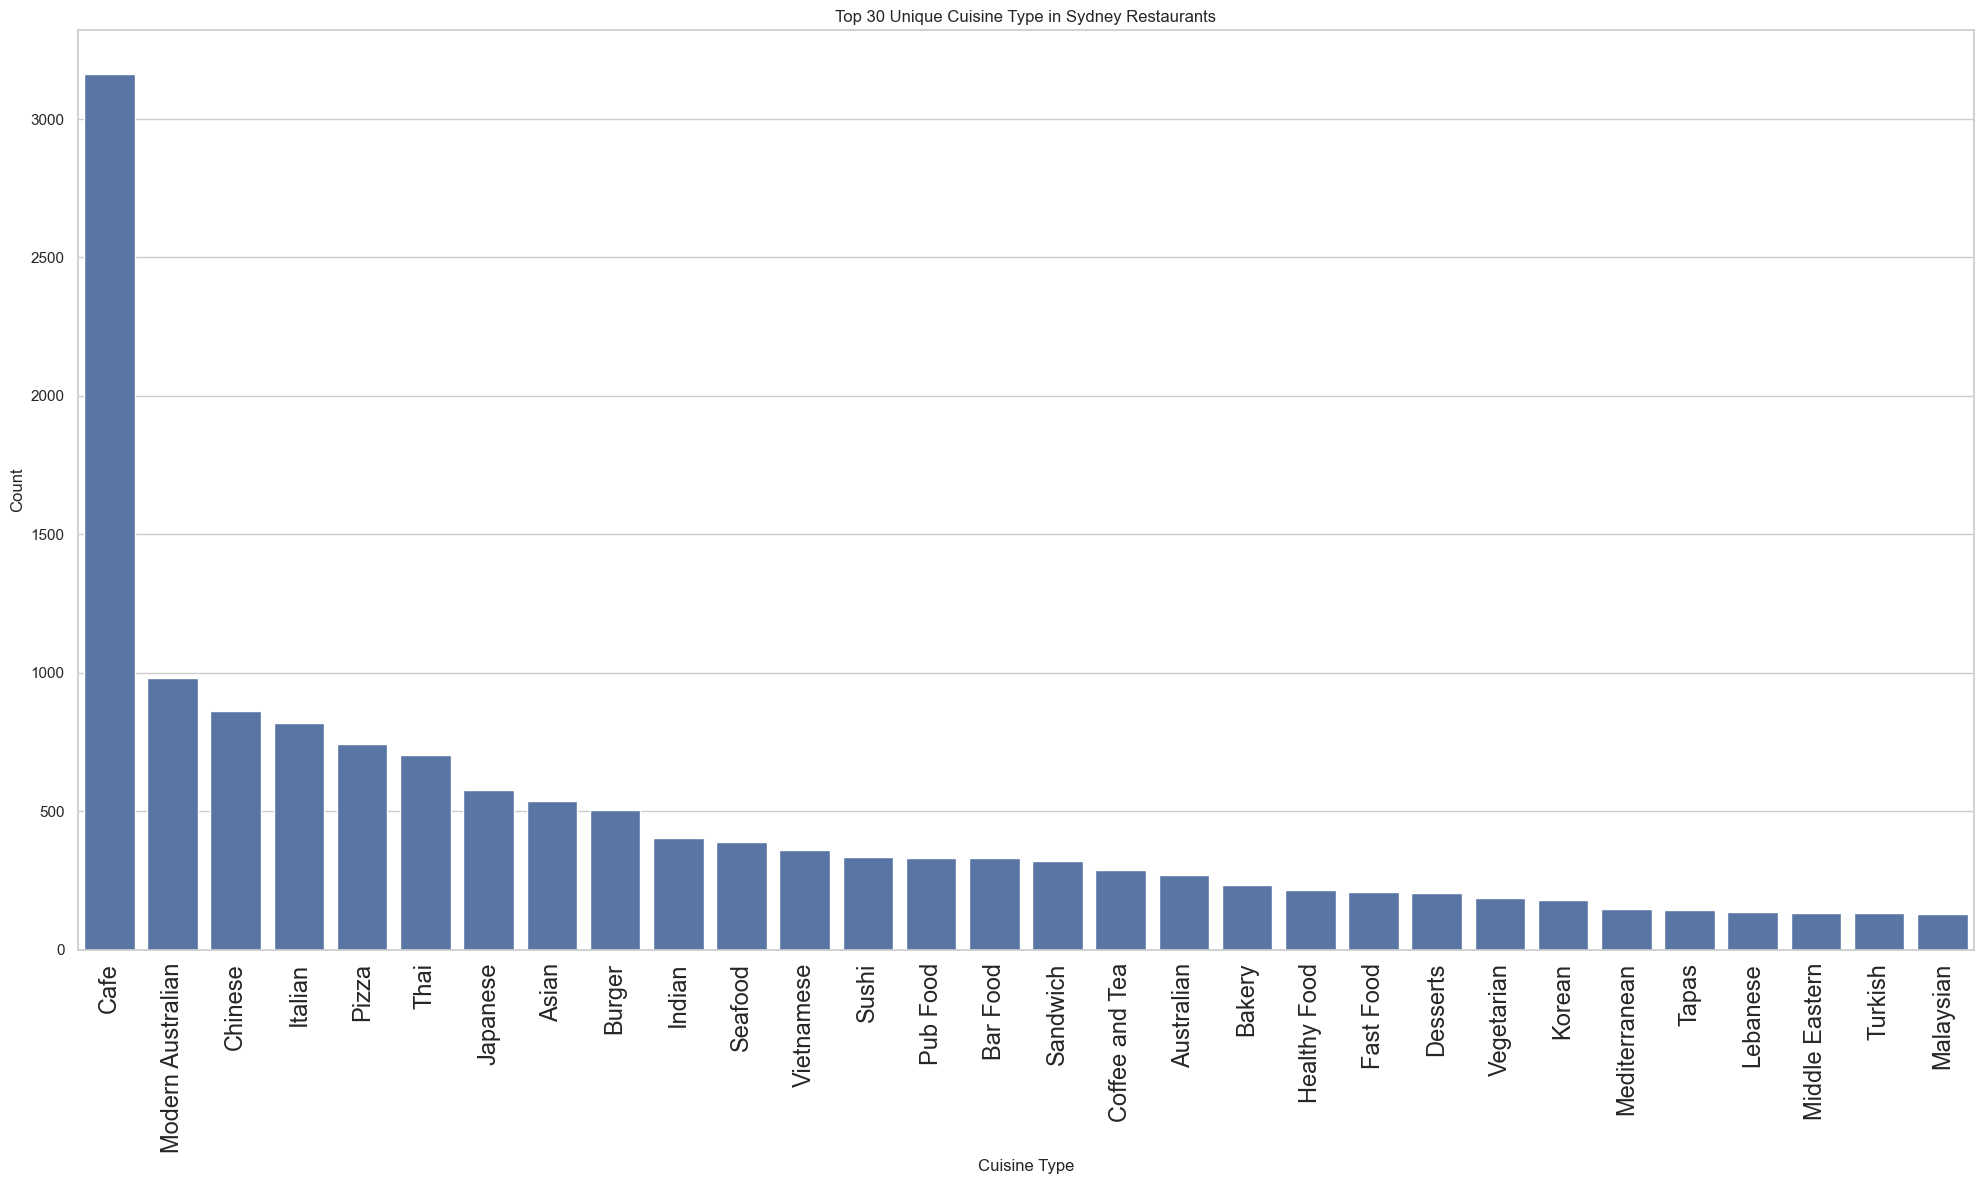

In [14]:
# Count the number of unique cuisines
cuisine_counts = df['unique_cuisine_list'].explode().value_counts()

# Select the top 30 cuisines
top_cuisines = cuisine_counts.head(30)
print(cuisine_counts)

# Plot the diagram
plt.figure(figsize=(20, 12))
sns.set(style='whitegrid')
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.title('Top 30 Unique Cuisine Type in Sydney Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

# Rotate the x-axis labels to make it clear
plt.xticks(rotation=90, fontsize=17)

# Display the plot
plt.tight_layout()
plt.show()


### Question 1.2 Which suburbs (top-3) have the highest number of restaurants?

In [16]:
# Define a function to extract suburbs from the 'subzone' column
def extract_suburb_from_subzone(subzone):
    parts = subzone.split(',')
    if len(parts) > 1:
        return parts[1].strip() 
    return parts[0].strip() 

# Define a function to extract suburbs from the 'address' column
def extract_suburb_from_address(address):
# If the address has multiple parts, return the second-to-last part (the suburb)
    parts = address.split(',')
    if len(parts) > 1:
        return parts[-2].strip()  
    return None

# Apply the function
df['suburb_from_subzone'] = df['subzone'].apply(extract_suburb_from_subzone)
df['suburb_from_address'] = df['address'].apply(extract_suburb_from_address) 

# If 'suburb_from_subzone' is missing, fill it with 'suburb_from_address'
df['suburb'] = df['suburb_from_subzone'].combine_first(df['suburb_from_address'])

# Count the number of subzone
suburb_counts = df['suburb'].value_counts()

# Print the result
suburb_counts

suburb
CBD                                792
Surry Hills                        269
Parramatta                         264
Chinatown                          228
Darlinghurst                       193
                                  ... 
Coogee Legion Club                   1
Royal Exhibition Hotel               1
Jenolan                              1
Sofitel Sydney Darling Harbour       1
Glenrose Villge Shopping Centre      1
Name: count, Length: 339, dtype: int64

In [17]:
# Select the top 3 suburbs that have the highest number of restaurants
top_suburbs = df['suburb'].value_counts()
top_suburbs = suburb_counts.head(3)

# Print the result
print(top_suburbs)
print(f'The top 3 suburbs with highest number of restaurants are: {top_suburbs.index[0]}, {top_suburbs.index[1]}, and {top_suburbs.index[2]}')

suburb
CBD            792
Surry Hills    269
Parramatta     264
Name: count, dtype: int64
The top 3 suburbs with highest number of restaurants are: CBD, Surry Hills, and Parramatta


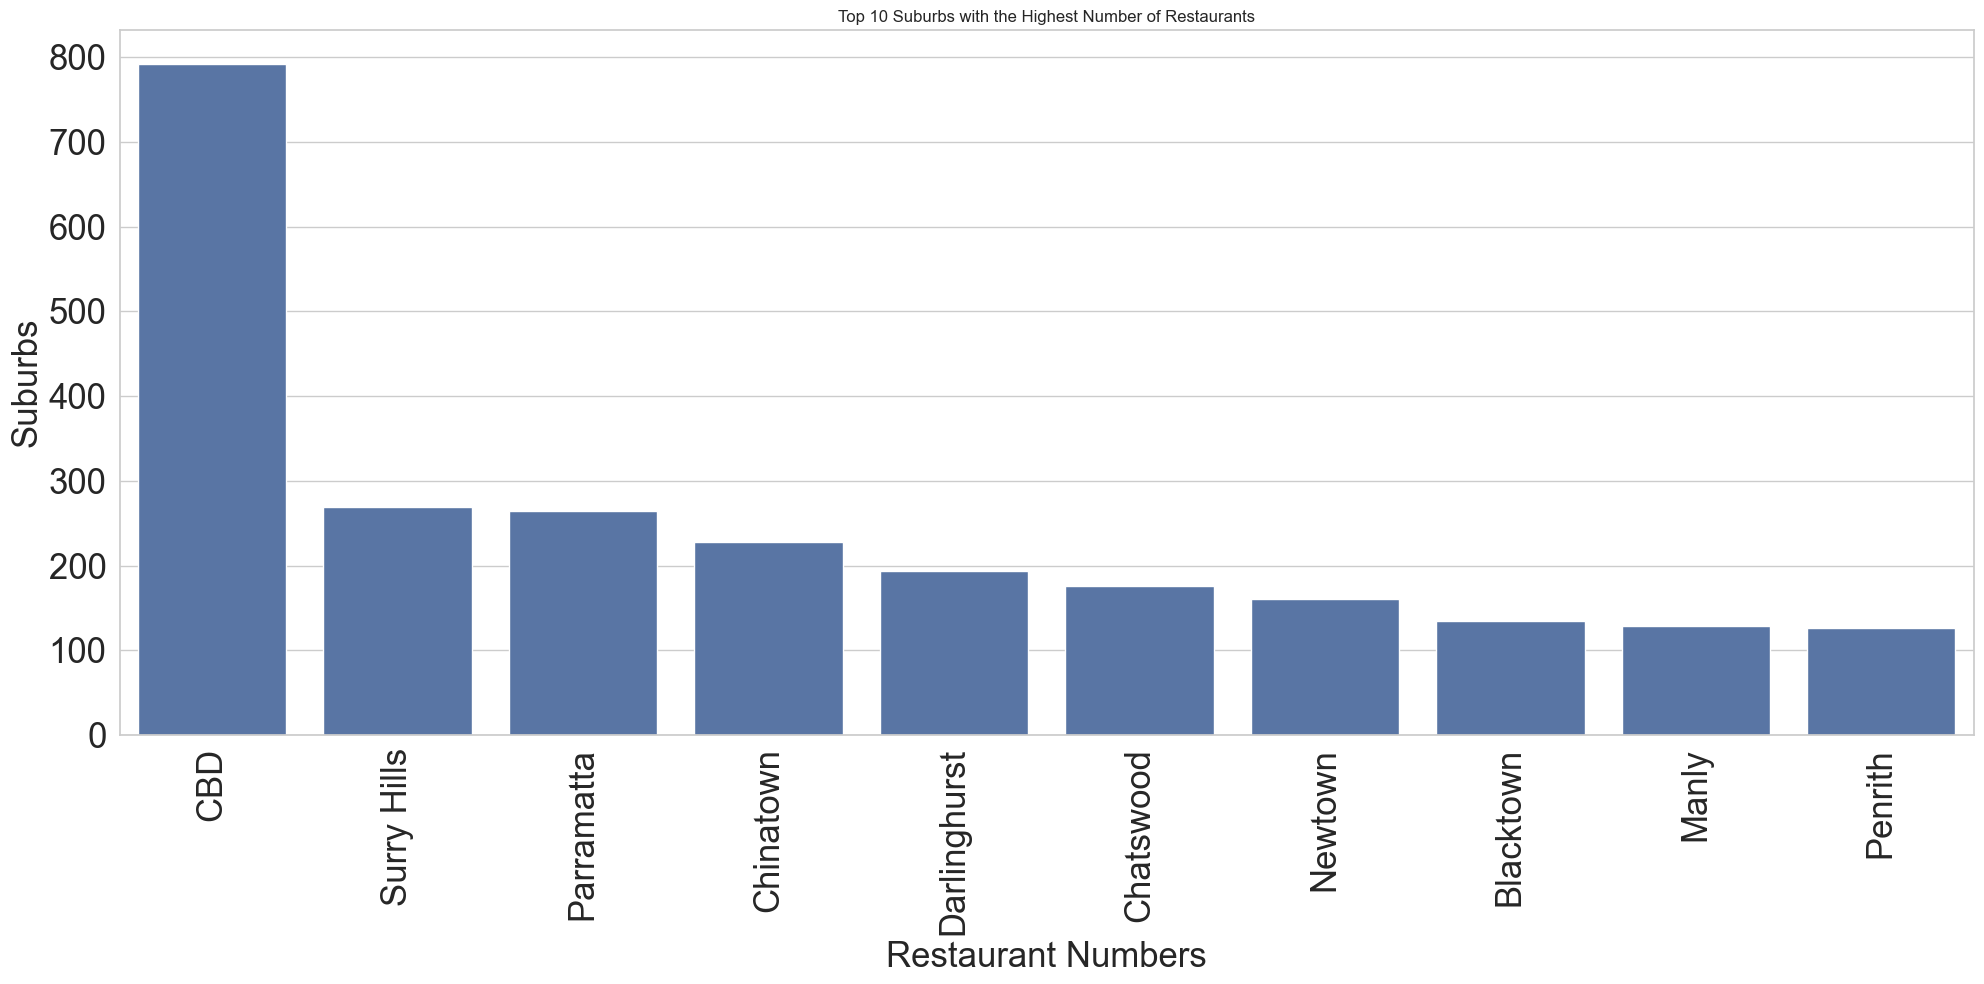

In [18]:
# Visualization of the top 10 suburbs with the highest number of restaurants
top_suburbs = df['suburb'].value_counts()
top_suburbs = suburb_counts.head(10)
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid')
sns.barplot(x=top_suburbs.index, y=top_suburbs.values)
plt.title('Top 10 Suburbs with the Highest Number of Restaurants')
plt.xlabel('Restaurant Numbers', fontsize=25)
plt.ylabel('Suburbs', fontsize=25)

# Adjust labels to make it clear
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize = 25)

# Display the plot
plt.tight_layout()
plt.show()


### Question 1.3 “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not? 

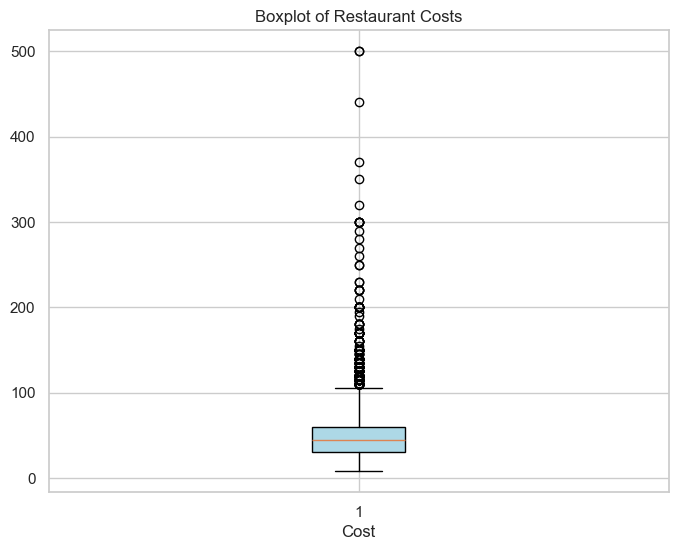

In [20]:
# Remove rows with missing data
df_cost= df.dropna(subset =['cost'])
df_rating_text = df.dropna(subset =['rating_text'])

# Use boxplot to get the distribution of the cost
plt.figure(figsize=(8, 6))
box = plt.boxplot(df_cost['cost'], vert=True, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
plt.title('Boxplot of Restaurant Costs')
plt.xlabel('Cost')
plt.show()

According to boxplot, the majority of restaurant costs are distributed between 0-200, so I will focus primarily on analyzing the 0-200 range, with some additional analysis of the 200-500 range.

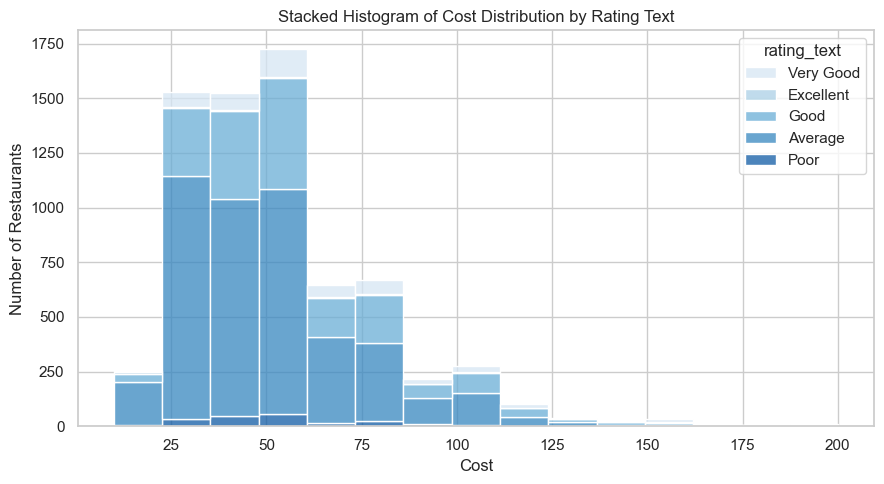

In [22]:
# Fliter the cost within 200
df_filtered = df[df['cost'] <= 200]

# Create a stacked histogram
plt.figure(figsize=(9, 5))
sns.histplot(data=df_filtered, x='cost', hue='rating_text', multiple='stack', bins=15, palette='Blues')
plt.title('Stacked Histogram of Cost Distribution by Rating Text')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')

# Print the stacked histogram
plt.tight_layout()
plt.show()

Since the base number of restaurants in each category is different, simply comparing the quantity is not accurate. Therefore, a heatmap will be used to compare the percentages.

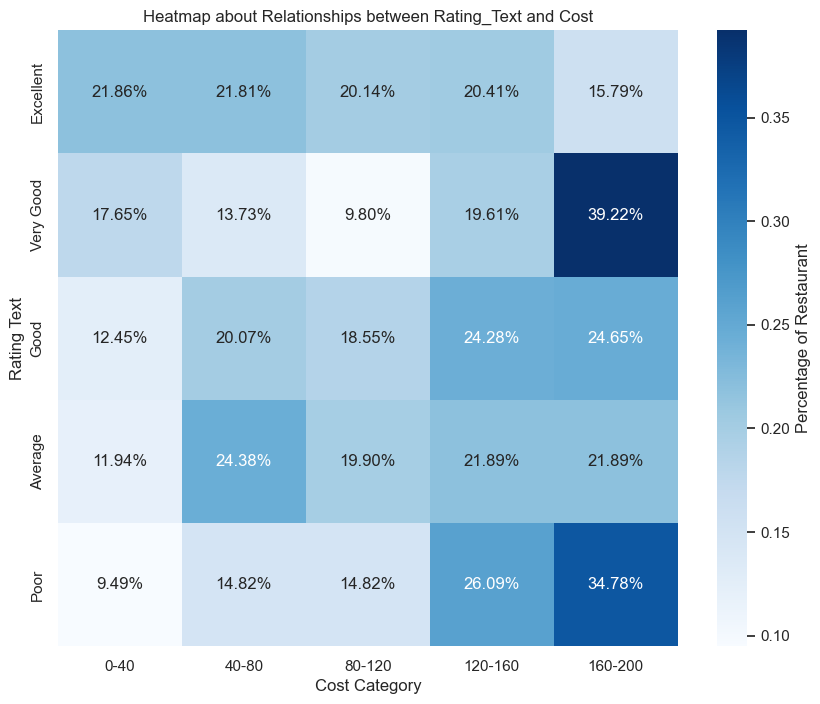

In [24]:
# Define cost range bins
df['cost_category'] = pd.qcut(df_cost['cost'], q=5, labels=['0-40', '40-80', '80-120', '120-160', '160-200'])

# Order the rating_text
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor']
df['rating_text'] = pd.Categorical(df['rating_text'], categories=rating_order, ordered=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=pd.crosstab(df_rating_text['rating_text'], df['cost_category'], normalize='index'),
            annot=True, 
            fmt=".2%", 
            cmap = 'Blues', 
            cbar_kws={'label': 'Percentage of Restaurant'}, 
            yticklabels=rating_order)

plt.title('Heatmap about Relationships between Rating_Text and Cost')
plt.xlabel('Cost Category')
plt.ylabel('Rating Text')

# Print the heatmap
plt.show()


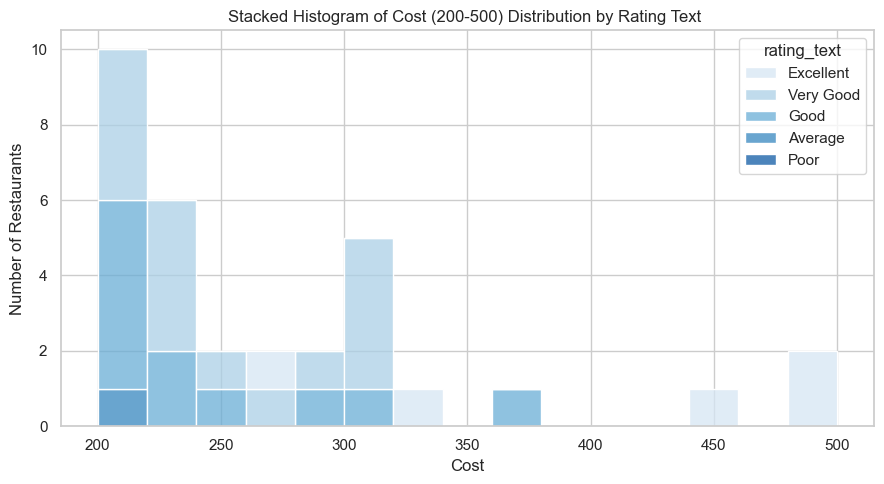

In [25]:
# Fliter the cost from 200 to 500
df_filtered = df[(df['cost'] >= 200) & (df['cost'] <= 500)]

# Create a stacked histogram
plt.figure(figsize=(9, 5))
sns.histplot(data=df_filtered, x='cost', hue='rating_text', multiple='stack', bins=15, palette='Blues')
plt.title('Stacked Histogram of Cost (200-500) Distribution by Rating Text ')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')

# Print the stacked histogram of the cost from 200 to 500
plt.tight_layout()
plt.show()

Conclusion

According to the heatmap, in the 0-200 cost range, it can be observed that for restaurants with "Excellent" ratings, only 15.79% fall into the 160+ cost category, whereas 21.86% of "Excellent" rated restaurants are in the under 40 cost category. Additionally, for the 'Poor' rating, 34.78% of restaurants in the 160+ cost category have a "Poor" rating, nearly three times the percentage of restaurants costing less than 40. This suggests that in the 0-200 cost range, restaurants with "Excellent" ratings are not always expensive, while those with "Poor" ratings are more likely to be costly.

On the other hand, according to the stacked histogram of cost (200-500) distribution, in the 200-500 cost range, only a small area is deep blue, which is the 'Poor' rating. So, it can be concluded that in the 200-500 cost range, restaurants with ‘excellent’ ratings are generally more expensive, while restaurants with "Poor" ratings are rarely cheap.

## Question 2 Perform Exploratory Analysis for the Data Variables

### 2.1 Cost

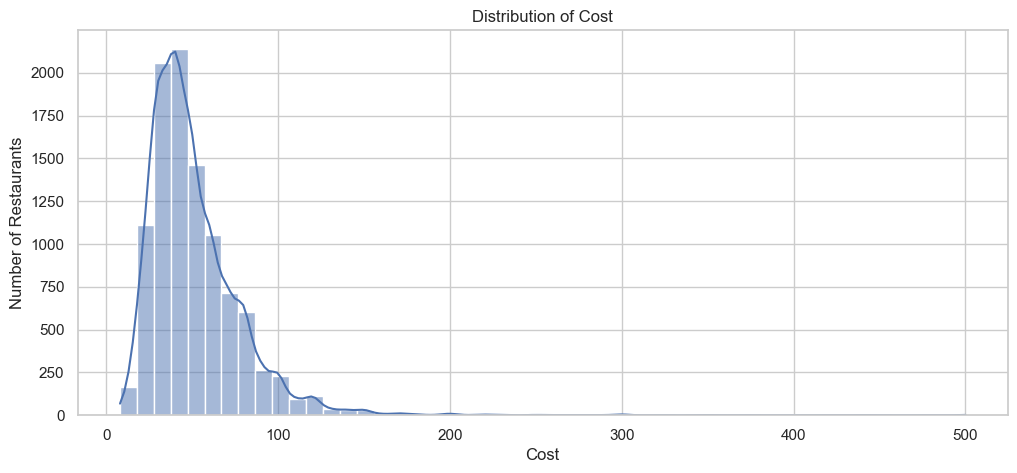

The highest cost is: 500.0
The lowest cost is: 8.0
Descriptive insights about cost column is：
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


In [29]:
# Plot the distribution of the 'cost' column
plt.figure(figsize=(12, 5))
sns.histplot(df['cost'], bins=50, kde=True) 
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')

# Print the plot
plt.show()

# Find the highest and lowest cost value
highest_cost = df['cost'].max()
lowest_cost = df['cost'].min()

# Print the result
print("The highest cost is:", highest_cost)
print("The lowest cost is:", lowest_cost)

# Print descriptive insights about the 'cost' column
cost = df['cost'].describe()
print(f'Descriptive insights about cost column is：\n{cost}')


### 2.2 Rating

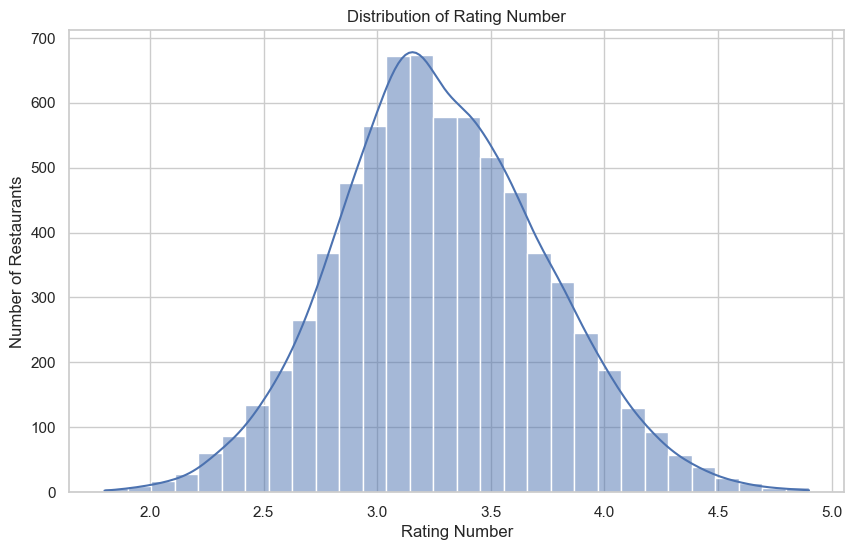

The highest rating number is: 4.9
The lowest rating number is: 1.8


In [71]:
# Plot the distribution of the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], bins=30, kde=True) 
plt.title('Distribution of Rating Number')
plt.xlabel('Rating Number')
plt.ylabel('Number of Restaurants')

# Print the plot
plt.show()

# Find the highest and lowest rating number
highest_rating_number = df['rating_number'].max()
lowest_rating_number = df['rating_number'].min()

# Print the result
print("The highest rating number is:", highest_rating_number)
print("The lowest rating number is:", lowest_rating_number)

2.3 Type

type
['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: count, Length: 66, dtype: int64


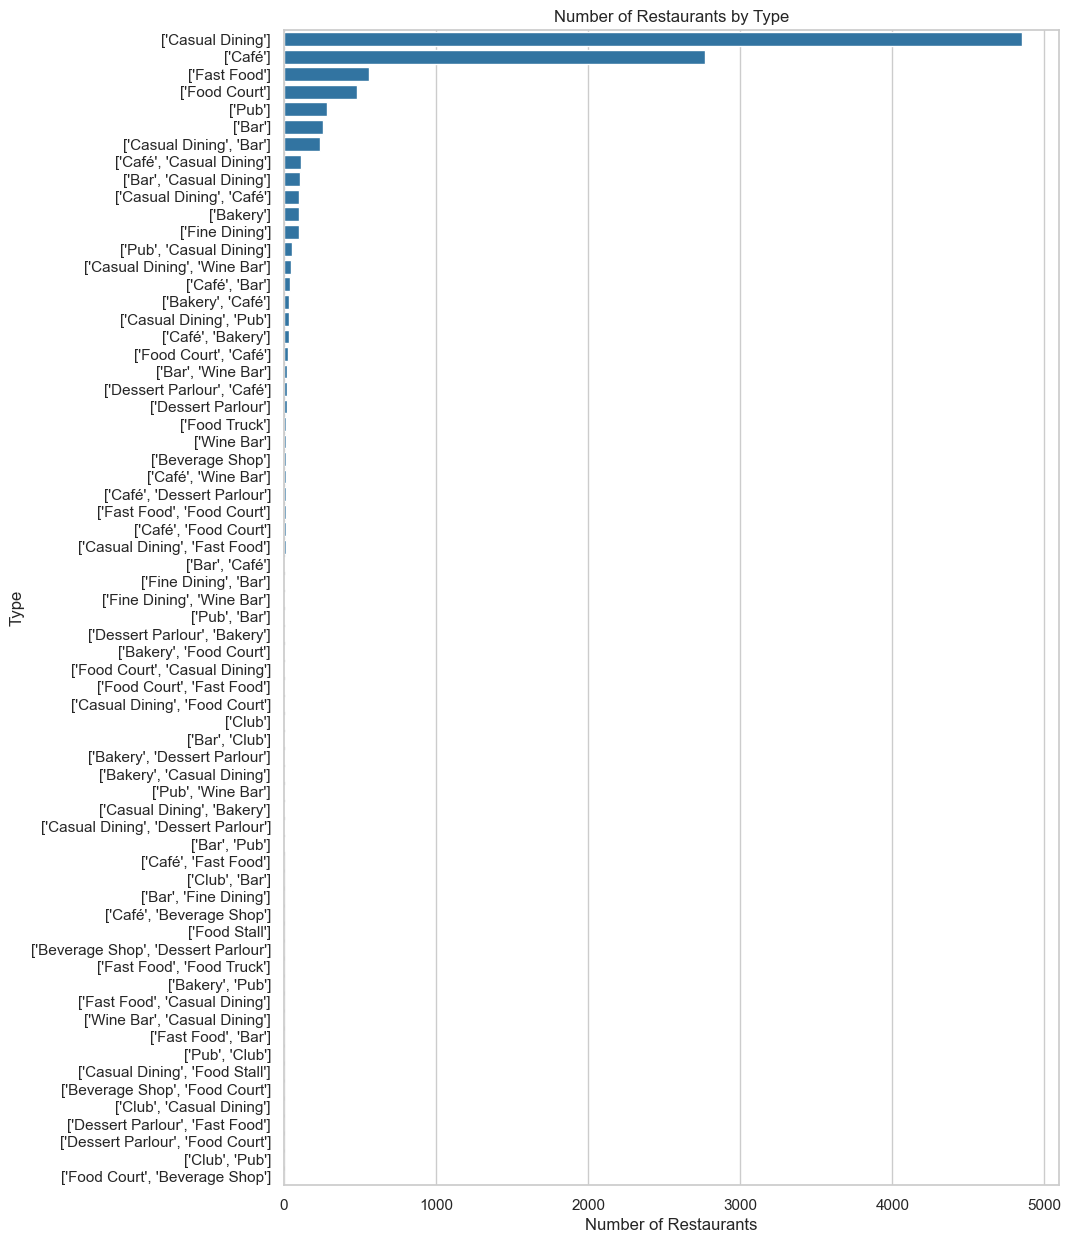

In [33]:
# Count the number of type
type_counts = df['type'].value_counts()
print(type_counts)

# Plot the diagram
plt.figure(figsize=(10, 15))
sns.barplot(y=type_counts.index, x=type_counts.values, color= '#1f77b4')
plt.title('Number of Restaurants by Type')
plt.xlabel('Number of Restaurants')
plt.ylabel('Type')

# Print the plot
plt.show()


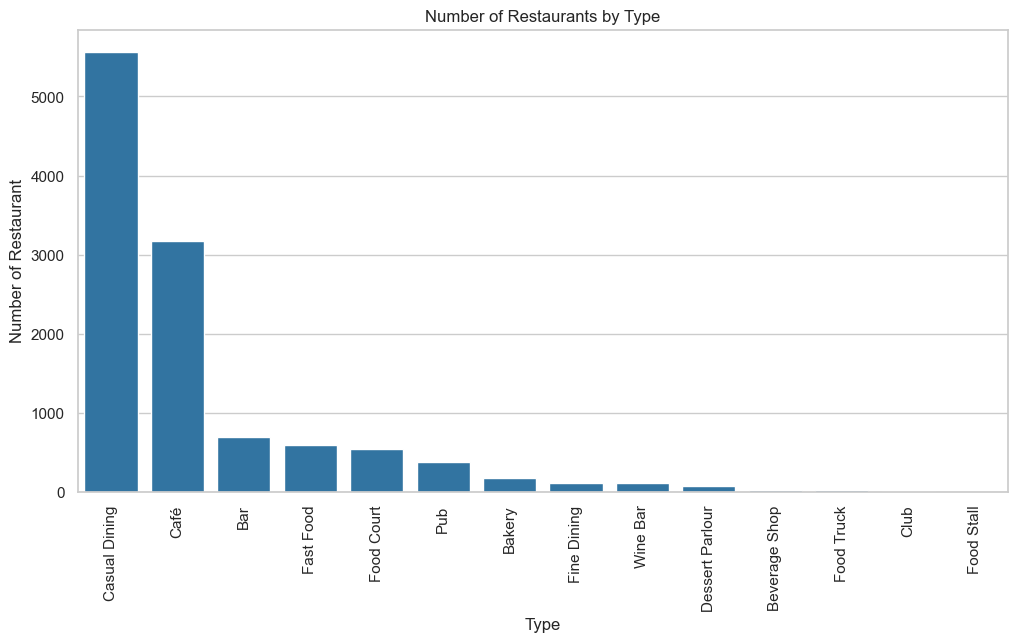

Counts for each Restaurant Type:
 Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64


In [34]:
# Only count single type

# Filter out rows with missing values 
df_filtered = df.dropna(subset=['type'])

# Create an empty list to store all unique restaurant types
types = []

# Add the types from each row to the list, and convert the string representation of the list into an actual list
for types_list in df_filtered['type']:
    if isinstance(types_list, list):
        types.extend(types_list)  
    else:
        types.extend(eval(types_list))  

# Convert the list of types to a Pandas Series
type_lists = pd.Series(types)

# Count single type
type_numbers = type_lists.value_counts()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=type_numbers.index, y=type_numbers.values, color='#1f77b4')
plt.title('Number of Restaurants by Type')
plt.xlabel('Type')
plt.ylabel('Number of Restaurant')
plt.xticks(rotation=90)  

# Print the plot
plt.show()

# Print the result
print("Counts for each Restaurant Type:\n", type_numbers)


## Question 3 Produce Cuisine Density Map

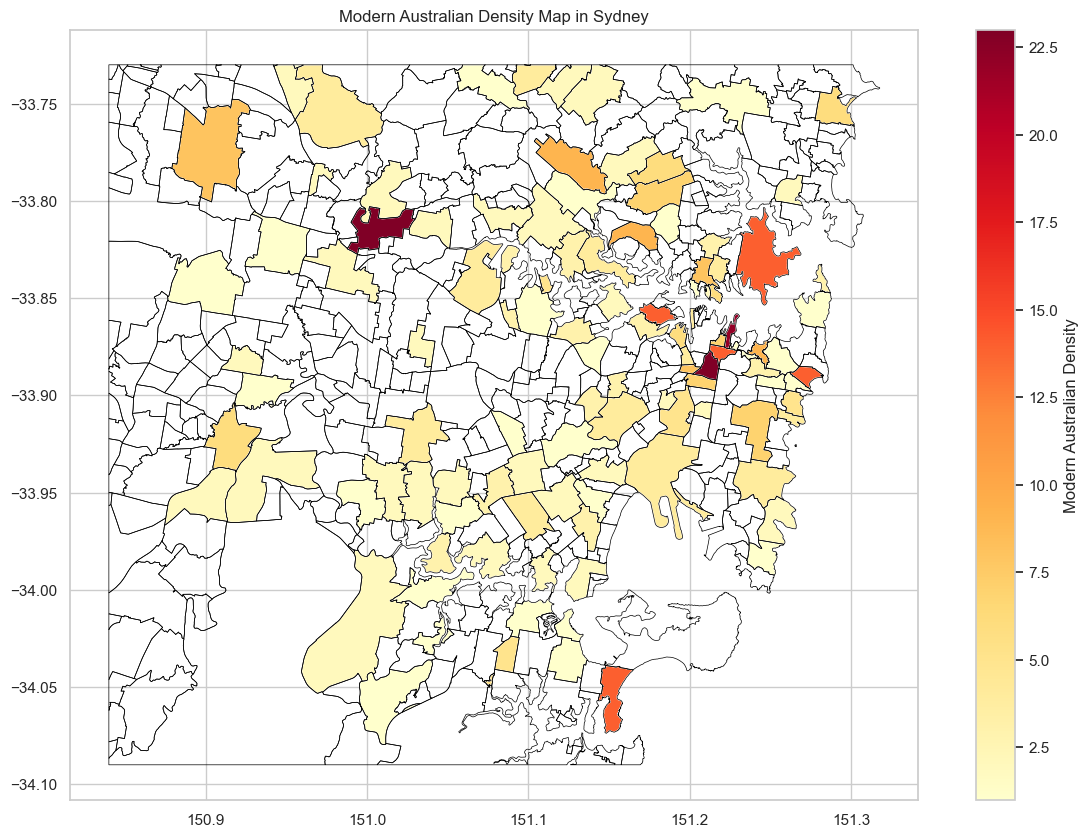

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the GeoJSON file using geopandas
geojson_path = 'C:/Users/lixu/Desktop/u3251456_CHEN_assignment1/sydney.geojson'
gdf = gpd.read_file(geojson_path)

# Define the function to show the selected cuisine density map
def show_cuisine_densitymap(cuisine='Modern Australian'):
    
    # Filter the data to only include selected cuisine
    filtered_gdf = df[df['cuisine'].apply(lambda x: cuisine in x)]
    
    # Group the data by suburb and count the number of restaurants
    suburb_counts = filtered_gdf.groupby('subzone').size().reset_index(name='Restaurant_Count')
    
    # Combine number of restaurants with Geodata
    restaurant_gdf = gdf.merge(suburb_counts, left_on='SSC_NAME', right_on='subzone', how='left')

    # Plot the cuisine density map
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # Plot the suburb boundaries
    restaurant_gdf.boundary.plot(ax=ax, linewidth=0.5, color='Black')
    
    # Plot the density of restaurants in each suburb
    restaurant_gdf.plot(column='Restaurant_Count', cmap='YlOrRd', ax=ax, legend=True,
                        legend_kwds={'label': f'{cuisine} Density'})
    plt.title(f'{cuisine} Density Map in Sydney')
    plt.show()

# Show Modern Australia cuisine density map
show_cuisine_densitymap(cuisine='Modern Australian')
